Build a ML model to predict the malignancy of breast cancer using the breast cancer wisconsin (diagnostic) dataset from sklearn toy datasets. Cover all aspects of an end-to-end ML project, right from data understanding, data exploration etc. and come up with a best possible model. All the code and observations should be crated in a jupyter notebook.

In [ ]:
#importing new libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


###Loading Dataset

In [ ]:
X, y = load_breast_cancer(return_X_y=True,as_frame=True) #The breast cancer dataset is a classic and very easy binary classification dataset.
                                          #return_X_y=True=>returns (data, target) instead of a Bunch object. 

###Data Understanding

In [ ]:
#Getting the dimensions of the data
X.shape

(569, 30)

Total number of samples = 569

Dimensionality of the dataset = 30 (the breast cancer dataset has 30 features)

In [ ]:
# Get column names
col = X.columns       # .columns gives columns names in data 
print(col)
for c in col:
  print('{} is unique: {}'.format(c, X[c].is_unique))

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
mean radius is unique: False
mean texture is unique: False
mean perimeter is unique: False
mean area is unique: False
mean smoothness is unique: False
mean compactness is unique: False
mean concavity is unique: False
mean concave points is unique: False
mean symmetry is unique: False
mean fractal dimension is unique: False
radius error i

Info on Attributes :    

a. radius (mean of distances from center to points on the perimeter)

b. texture (standard deviation of gray-scale values)

c. perimeter

d) area

e) smoothness (local variation in radius lengths)

f. compactness (perimeter² / area — 1.0)

g. concavity (severity of concave portions of the contour)

h. concave points (number of concave portions of the contour)

i. symmetry j) fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. 

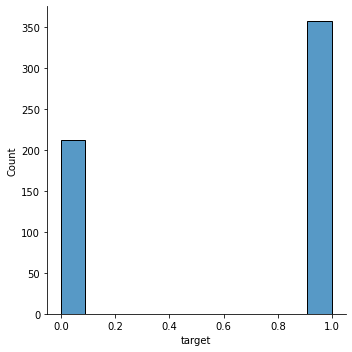

In [ ]:
y.shape
sns.displot(y)

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


Here we can see that there are 30 attributes in total here

In [ ]:
# Get column data types and missing values in Columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


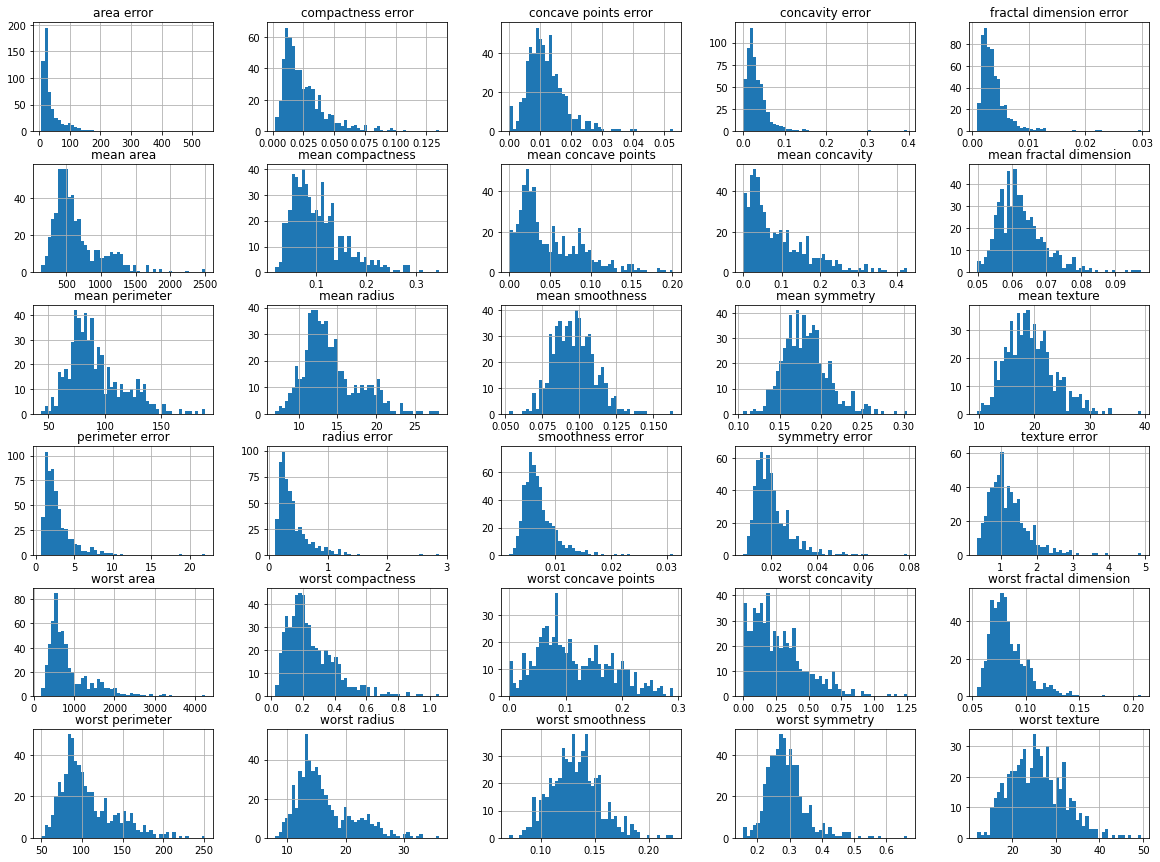

In [ ]:
# Numerical attributes can also be described using histograms
%matplotlib inline
import matplotlib.pyplot as plt
#use hist method on dataframe
# Your code below
X.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Checking missing or null data points
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

No null values present in any of the columns or feature values.

###Data Exploration 

Number of Benign:  357
Number of Malignant :  212


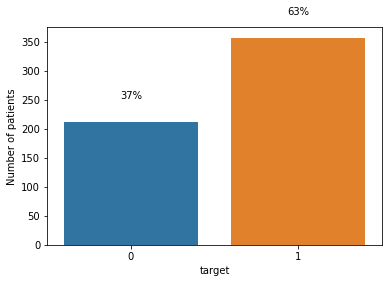

In [ ]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
ax.set_ylabel('Number of patients')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

From the above plot for the target values, we can see that the dataset is imbalanced because Benign(target value 1) takes up 63% of the whole data whereas it's just 37% for the other target value.So, because of this we will be using other metrics also (like precision,recall,f1_score) to evaluate a particular model.

In [ ]:
# # plotting the pairplot
# sns.pairplot(X)

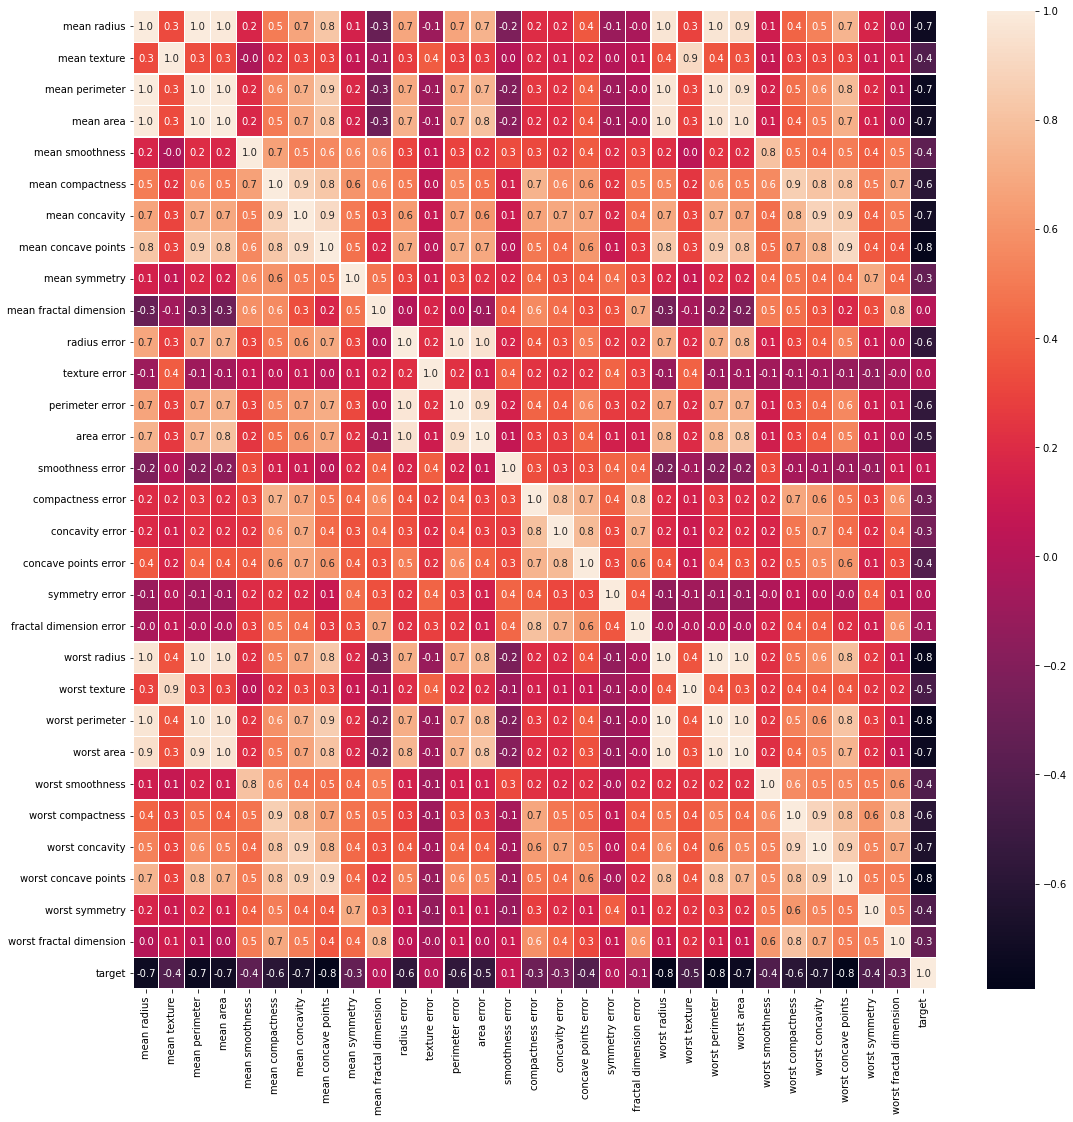

In [ ]:
#correlation map
X1 = X.copy()
X1['target'] = y
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


From the above heat map plot we can see that how some of the features are correlated to each other and how some of them are not correlated to each other.
Here,each square shows the correlation between the features on each axis.
Correlation ranges from -1 to +1 here.The diagonal elements show perfect correlation (since,each feature correlates perfectly to itself).Here, since the target value 1 indicates benign, that is why we see majorly negative correlation between target and other features because larger the value of features (like for example malign cells usually have greater radius,texture,greater perimeter,area,smoothness,concavity,compactness etc than benign cells) 
Hence, that's why negative correlations seen with features and target.Other positive correlation among features to features can also be seen.


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#SVM

In [ ]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_class = SVC(kernel = 'rbf', random_state = 0)
svc_class.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred1 = svc_class.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)

In [ ]:
# Calculating the accuracies
from sklearn.metrics import classification_report
print("Training accuracy :", svc_class.score(X_train, y_train))
print("Testing accuarcy :", svc_class.score(X_test, y_test))

# classification report
cr1 = classification_report(y_test, y_pred1)
print(cr1)

Training accuracy : 0.9846153846153847
Testing accuarcy : 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Text(0.5, 257.44, 'Predicted label')

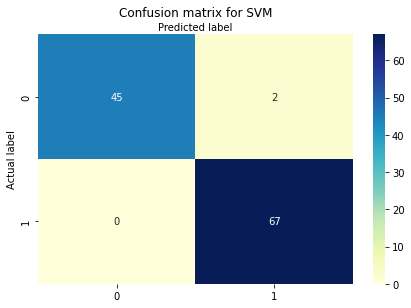

In [ ]:
# plot confusion_matrix

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# using grid search to find the best parameters for svm
from sklearn.model_selection import GridSearchCV
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc_class, param_grid = param, scoring = 'accuracy', cv = 10)


In [ ]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=0),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
grid_svc.best_params_

{'C': 0.9, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
# creating a new SVC model with these best parameters

svc_class2 = SVC(C = 0.9, gamma = 0.1, kernel = 'linear')
svc_class2.fit(X_train, y_train)
y_predn = svc_class2.predict(X_test)

print(classification_report(y_test, y_predn))

print("Testing accuarcy :", svc_class2.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Testing accuarcy : 0.9736842105263158


In [ ]:
# get precision, recall and F-measure
prec_score1 = precision_score(y_test, y_pred1)
rec_score1 = recall_score(y_test, y_pred1)
f_measure1 =  f1_score(y_test, y_pred1)

print('Precision: {:.3f}'.format(prec_score1))
print('Recall: {:.3f}'.format(rec_score1))
print('f1_score: {:.3f}'.format(f_measure1))

Precision: 0.971
Recall: 1.000
f1_score: 0.985


#Decision Tree Classifier

In [ ]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_class.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred2 = dt_class.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)

In [ ]:
print("Training accuracy :", dt_class.score(X_train, y_train))
print("Testing accuarcy :", dt_class.score(X_test, y_test))

# classification report
cr2 = classification_report(y_test, y_pred2)
print(cr2)

Training accuracy : 1.0
Testing accuarcy : 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        47
           1       0.95      0.93      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



Text(0.5, 257.44, 'Predicted label')

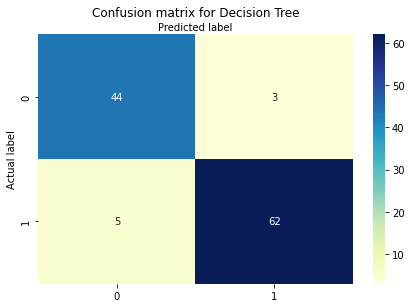

In [ ]:
# plot confusion_matrix

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# get precision, recall and F-measure
prec_score2 = precision_score(y_test, y_pred2)
rec_score2 = recall_score(y_test, y_pred2)
f_measure2 =  f1_score(y_test, y_pred2)

print('Precision: {:.3f}'.format(prec_score2))
print('Recall: {:.3f}'.format(rec_score2))
print('f1_score: {:.3f}'.format(f_measure2))

Precision: 0.954
Recall: 0.925
f1_score: 0.939


#RandomForest Classifier

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf_class.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)

In [ ]:
# Calculating the accuracies
print("Training accuracy :", rf_class.score(X_train, y_train))
print("Testing accuarcy :", rf_class.score(X_test, y_test))

Training accuracy : 1.0
Testing accuarcy : 0.9649122807017544


In [ ]:
# classification report
cr3 = classification_report(y_test, y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 257.44, 'Predicted label')

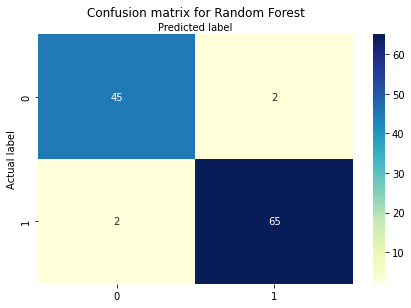

In [ ]:
# plot confusion_matrix

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# get precision, recall and F-measure
prec_score3 = precision_score(y_test, y_pred3)
rec_score3 = recall_score(y_test, y_pred3)
f_measure3 =  f1_score(y_test, y_pred3)

print('Precision: {:.3f}'.format(prec_score3))
print('Recall: {:.3f}'.format(rec_score3))
print('f1_score: {:.3f}'.format(f_measure3))

Precision: 0.970
Recall: 0.970
f1_score: 0.970


In [ ]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(20,30))}]
clf = GridSearchCV(rf_class, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                           29]}],
             scoring='accuracy')

In [ ]:
clf.best_params_

{'max_depth': 10, 'max_features': 28}

In [ ]:
# creating a new SVC model with these best parameters
rf_model2 = RandomForestClassifier(max_depth=13,max_features=20)
rf_model2.fit(X_train, y_train)
y_predrf = rf_model2.predict(X_test)

print(classification_report(y_test, y_predrf))

print("Testing accuarcy :", rf_model2.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Testing accuarcy : 0.9824561403508771


In [ ]:
f_measurerf =  f1_score(y_test, y_predrf)
print('f1_score of Random Forest: {:.3f}'.format(f_measurerf))

f1_score of Random Forest: 0.985


#Logistic Regression

In [ ]:
# Instantiate logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
# perform a 5-fold CV and get the accuracies of the trained instances; use 'accuracy' metric for scoring param
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
accuracies = cross_val_score(log_reg , X_train, y_train, scoring='accuracy')# fill your code here
print(accuracies)

[0.98901099 0.97802198 0.94505495 1.         0.98901099]


In [ ]:
# find the performance of the model as the average of the above accuracies
acc = np.mean(accuracies) # fill your code here
print(f"{acc:.3f}")

0.980


In [ ]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(log_reg, X_test, y_test) 

Text(0.5, 257.44, 'Predicted label')

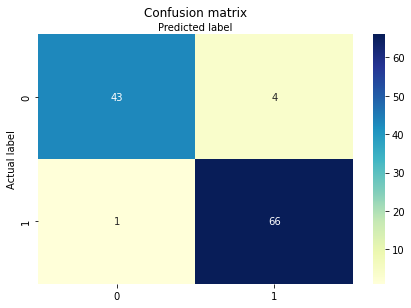

In [ ]:
# plot confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

C = confusion_matrix(y_test, predictions)# fill your code here

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# get precision, recall and F-measure
prec_score = precision_score(y_test, predictions)# fill your code here
rec_score5 = recall_score(y_test, predictions)# fill your code here
f_measure =  f1_score(y_test, predictions)# fill your code here

print('Precision: {:.3f}'.format(prec_score))
print('Recall: {:.3f}'.format(rec_score5))
print('f1_score: {:.3f}'.format(f_measure))

Precision: 0.943
Recall: 0.985
f1_score: 0.964


#KNeighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train,y_train)

In [ ]:
y_pred4 = kn_model.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)

In [ ]:
# Calculating the accuracies
print("Training accuracy :", kn_model.score(X_train, y_train))
print("Testing accuarcy :", kn_model.score(X_test, y_test))

Training accuracy : 1.0
Testing accuarcy : 0.956140350877193


In [ ]:
# classification report
cr4 = classification_report(y_test, y_pred4)
print(cr4)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 257.44, 'Predicted label')

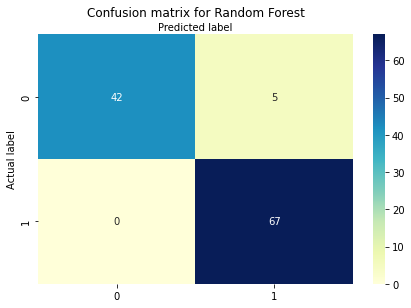

In [ ]:
# plot confusion_matrix

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# get precision, recall and F-measure
prec_score4 = precision_score(y_test, y_pred4)
# rec__score4 = recall_score(y_test, y_pred4)
f_measure4 =  f1_score(y_test, y_pred4)

print('Precision: {:.3f}'.format(prec_score4))
# print('Recall: {:.3f}'.format(rec__score4))
print('f1_score: {:.3f}'.format(f_measure4))

Precision: 0.931
f1_score: 0.964


In [ ]:
param_kn = {
    'n_neighbors': [3,5,12,18],
    'weights':['uniform', 'distance'],
    'metric' :['euclidean','manhattan']
}
grid_knn = GridSearchCV(kn_model, param_grid = param_kn,cv=3,verbose=1)


In [ ]:
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 12, 18],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
grid_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
# creating a new SVC model with these best parameters
kn_model2 = KNeighborsClassifier(n_neighbors=5, weights='uniform',metric='euclidean').fit(X_train,y_train)
kn_model2.fit(X_train, y_train)
y_predkn = kn_model2.predict(X_test)

print(classification_report(y_test, y_predkn))

print("Testing accuarcy :", kn_model2.score(X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Testing accuarcy : 0.956140350877193


Text(0.5, 257.44, 'Predicted label')

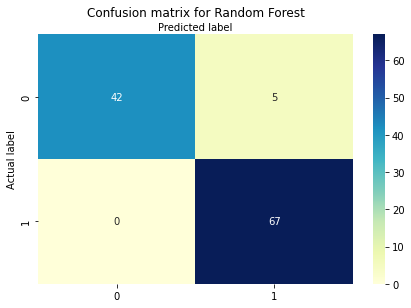

In [ ]:
cm5 = confusion_matrix(y_test, y_predkn)
# plot confusion_matrix
fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# get precision, recall and F-measure
prec_scorekn = precision_score(y_test, y_predkn)# fill your code here
rec_score4 = recall_score(y_test, y_predkn)# fill your code here
f_measurekn =  f1_score(y_test, y_predkn)# fill your code here

print('Precision: {:.3f}'.format(prec_scorekn))
print('Recall: {:.3f}'.format(rec_score4))
print('f1_score: {:.3f}'.format(f_measurekn))

Precision: 0.931
Recall: 1.000
f1_score: 0.964


##Model Comparisons :

In [ ]:
print("Testing accuarcy of Linear SVM :", svc_class2.score(X_test, y_test))
print('f1_score of linear SVM : {:.3f}'.format(f_measure1))

print("Training accuracy of Decision Tree :", dt_class.score(X_train, y_train))
print("Testing accuarcy of Descision Tree:", dt_class.score(X_test, y_test))
print('f1_score of Decision Tree: {:.3f}'.format(f_measure2))

print("Testing accuarcy of Random Forest classifier:", rf_model2.score(X_test, y_test))
print('f1_score of Random Forest: {:.3f}'.format(f_measurerf))

print(f"Accuracy of logistic regression : {acc:.3f}")
print('f1_score of LR : {:.3f}'.format(f_measure))

print("Testing accuarcy of KNN classifier:", kn_model2.score(X_test, y_test))
print('f1_score of KNN classifier: {:.3f}'.format(f_measurekn))

Testing accuarcy of Linear SVM : 0.9736842105263158
f1_score of linear SVM : 0.985
Training accuracy of Decision Tree : 1.0
Testing accuarcy of Descision Tree: 0.9298245614035088
f1_score of Decision Tree: 0.939
Testing accuarcy of Random Forest classifier: 0.9824561403508771
f1_score of Random Forest: 0.985
Accuracy of logistic regression : 0.980
f1_score of LR : 0.964
Testing accuarcy of KNN classifier: 0.956140350877193
f1_score of KNN classifier: 0.964


Linear SVM, Random Forest Classifier,Logistic regression and KNN classfiers have got more than 95% accuracy.Out of these Random Forest classifier and Linear SVM seems to be the best classifiers.